In [1]:
import numpy as np 
import pandas as ps
import seaborn as sns
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = ps.read_csv('co2.csv')
df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


<Axes: xlabel='out1', ylabel='count'>

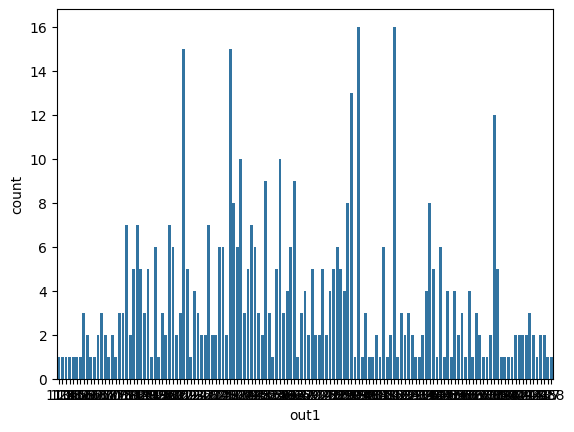

In [3]:
sns.countplot(x='out1' , data=df)

<Axes: >

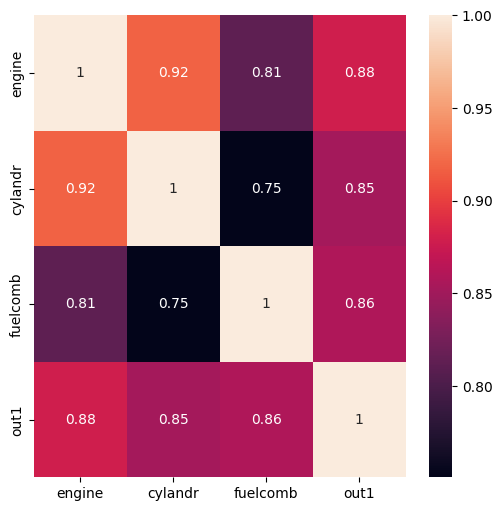

In [4]:
plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

In [5]:
x = df.drop("out1" , axis=1)
y = df.out1

In [6]:
x

,engine,cylandr,fuelcomb
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
495,1.5,4,6.9
496,1.5,4,7.5
497,1.5,4,7.7
498,3.5,6,10.6


In [7]:

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

In [8]:
x_train

,engine,cylandr,fuelcomb
149,2.0,4,9.9
395,1.6,4,7.0
20,2.0,4,8.8
315,2.4,4,8.6
357,2.0,4,9.6
...,...,...,...
365,3.5,6,11.9
160,2.0,4,10.1
42,2.0,4,9.2
165,3.6,6,10.8


In [9]:
reg_linear = linear_model.LinearRegression()

In [10]:
reg_linear.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
out1_robot = reg_linear.predict(x_test)

In [12]:
out1_robot

array([325.9587016 , 241.66796836, 300.354272  , 312.79552858,
       379.95781281, 336.29494318, 289.09856832, 357.33846276,
       259.7766138 , 410.88174832, 331.96344451, 292.70815054,
       196.69807716, 258.77807765, 249.60904925, 254.72319869,
       254.66246436, 316.80319917, 336.29494318, 329.4738671 ,
       379.95781281, 361.79143009, 390.88397325, 301.07618844,
       278.99173809, 185.53197645, 247.44329991, 307.02019702,
       212.80965029, 251.11361647, 298.35719969, 186.2538929 ,
       192.36657849, 333.80536577, 361.79143009, 183.81152385,
       260.66720727, 198.31058707, 316.80319917, 271.32727691,
       266.71915854, 206.25166796, 372.3907654 , 206.97358441,
       298.4834821 , 203.70135623, 318.30776639, 372.3907654 ,
       342.51557147, 254.44657898, 292.93756189, 235.17072036,
       347.52177822, 243.11180125, 329.64254413, 330.91769999,
       316.29716811, 227.22963947, 196.86675418, 256.61232831,
       350.01135562, 209.86125019, 251.5589132 , 213.47

In [13]:
y_test

343    373
105    232
53     306
120    338
19     359
      ... 
32     265
214    344
292    269
223    414
169    253
Name: out1, Length: 100, dtype: int64

In [14]:
x_test

,engine,cylandr,fuelcomb
343,4.6,8,16.2
105,3.0,6,10.1
53,4.2,8,13.3
120,4.4,8,14.7
19,5.9,12,15.6
...,...,...,...
32,4.0,8,11.3
214,5.3,8,21.5
292,3.6,6,16.8
223,4.8,8,18.0


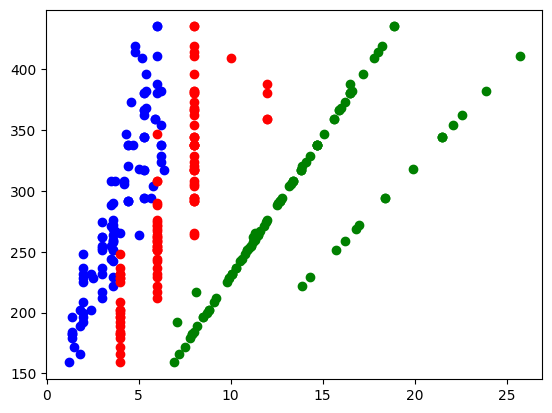

In [19]:
plt.scatter(x_test.engine, y_test, color="blue")
plt.scatter(x_test.cylandr, y_test, color="red")
plt.scatter(x_test.fuelcomb, y_test, color="green")
plt.show()

In [20]:
suzoki = np.array([[9.7 , 4.21  , 14.8]])
co2 = reg_linear.predict(suzoki)

c:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
co2

array([334.48863888])

In [24]:
sm.mean_squared_error(y_test , out1_robot)

772.5379230405507